In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv(r"C:\DATA SCIENCE\PROJECT FOLDERS\prj_restaurant_recommendation\cleaned_df.csv")


In [9]:
df.head()

,ID.No,NAME,CITY,RATING,Rating_Count,COST,CUISINE,License_No,LINK,ADDRESS,MENU
0,567335,Ab foods point,Abohar,0.0,5,200.0,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"Ab Foods Point, Near Rishi Narang Dental Clini...",Menu/567335.json
1,531342,Janta sweet house,Abohar,4.4,50,200.0,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,Theka coffee desi,Abohar,3.8,100,100.0,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"Theka Coffee Desi, Sahtiya Sadan Road City",Menu/158203.json
3,187912,Singh hut,Abohar,3.7,20,250.0,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, Circular Road Near Nehru Park Abohar",Menu/187912.json
4,543530,Grill masters,Abohar,0.0,5,250.0,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"Grill Masters, Ada Heights, Abohar - Hanumanga...",Menu/543530.json


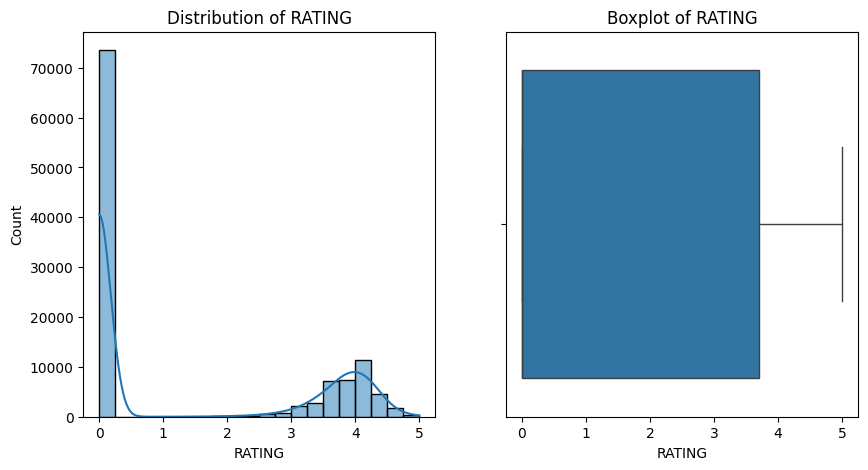

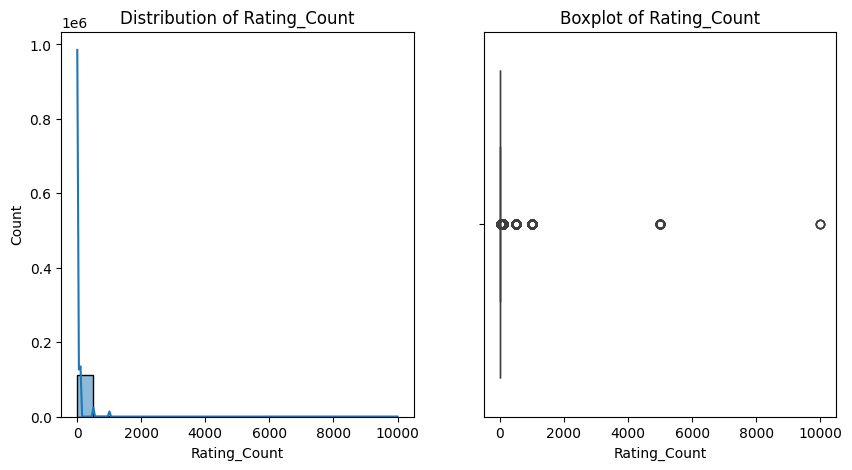

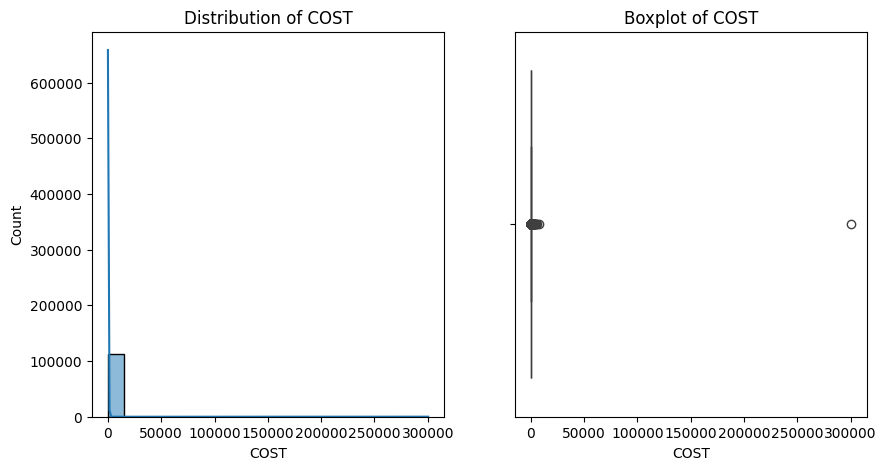

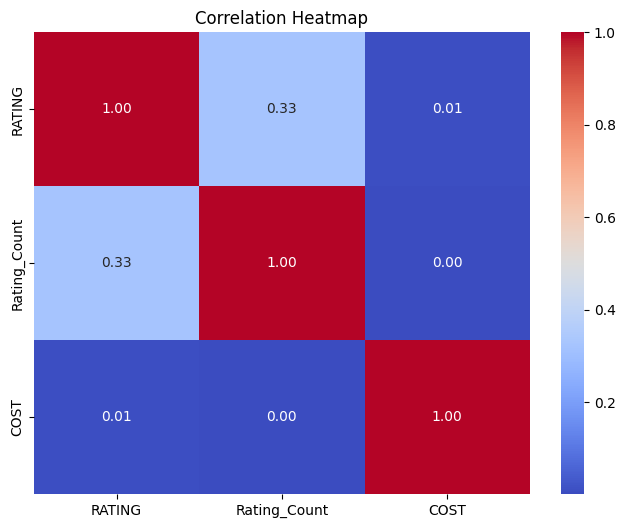

In [11]:

def plot_numerical_distributions(df):
    numerical_columns = ['RATING', 'Rating_Count', 'COST']
    
    for col in numerical_columns:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col].dropna(), kde=True, bins=20)
        plt.title(f'Distribution of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        
        plt.show()

plot_numerical_distributions(df)




# 5. Heatmap of Correlation between Numerical Columns
def plot_correlation_heatmap(df):
    numerical_columns = ['RATING','Rating_Count','COST']
    correlation_matrix = df[numerical_columns].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(df)



In [32]:
c = df[df['COST'] > 200000]
print(c)

Empty DataFrame
Columns: [ID.No, NAME, CITY, RATING, Rating_Count, COST, CUISINE, License_No, LINK, ADDRESS, MENU]
Index: []


In [31]:
df = df[df['COST'] <= 200000]

In [27]:
df.columns

Index(['ID.No', 'NAME', 'CITY', 'RATING', 'Rating_Count', 'CUISINE',
       'License_No', 'LINK', 'ADDRESS', 'MENU', 'License_No_clean'],
      dtype='object')

In [14]:
# First, filter the rows with License issue (either 'License' or NaN)
license_issues = df[df['License_No'].isna() | (df['License_No'].str.strip().str.lower() == 'license')]

# Group by CITY and count the number of such entries
license_issue_counts = license_issues['CITY'].value_counts().reset_index()
license_issue_counts.columns = ['CITY', 'License_Issue_Count']

# Display the result
print(license_issue_counts.head(10))


                           CITY  License_Issue_Count
0                       Bikaner                  209
1                         Patna                  109
2            Madhapur,Hyderabad                  102
3             Indirapuram,Delhi                   92
4                  Rohini,Delhi                   79
5        Governorpet,Vijayawada                   78
6             Laxmi Nagar,Delhi                   73
7  Old Gurgaon (Zone 6),Gurgaon                   70
8            sohna road,Gurgaon                   69
9           Ganeshguri,Guwahati                   67


C:\Users\123\AppData\Local\Temp\ipykernel_15564\1329464902.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CITY', y='License_Issue_Count', data=top_10_issues, palette='viridis')


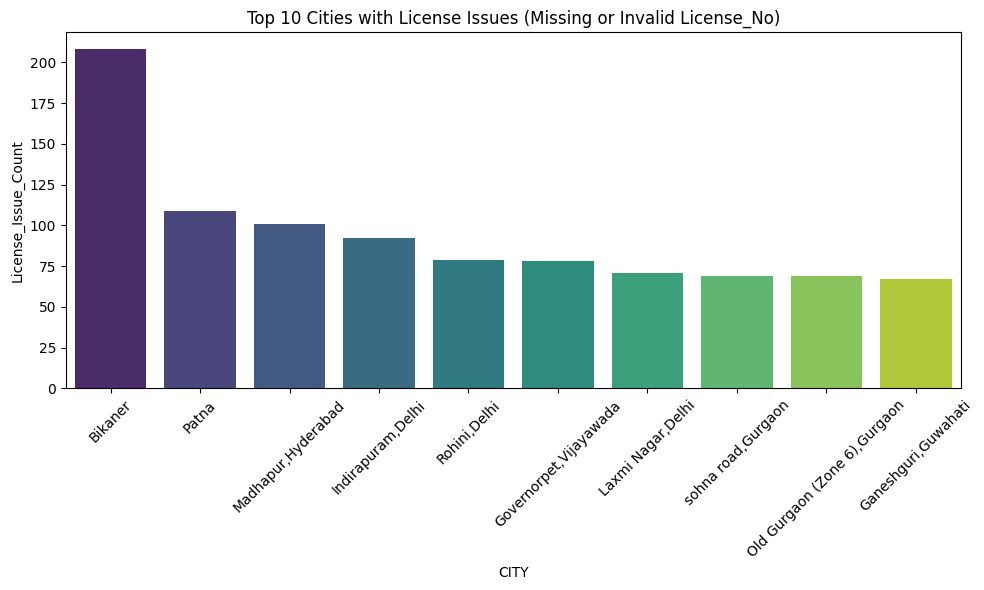

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, filter the rows with License issue (either 'License' or NaN)
license_issues = df[ (df['License_No'].str.strip().str.lower() == 'license')]

# Group by CITY and count the number of such entries
license_issue_counts = license_issues['CITY'].value_counts().reset_index()
license_issue_counts.columns = ['CITY', 'License_Issue_Count']

# Select top 10 cities
top_10_issues = license_issue_counts.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='CITY', y='License_Issue_Count', data=top_10_issues, palette='viridis')
plt.title('Top 10 Cities with License Issues (Missing or Invalid License_No)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
df[df['License_No']== 'license'].sum()


ID.No                                                  3995689531
NAME            Swastik dhabaBharawan da dhabaShri balaji fast...
CITY            AboharAboharAboharAboharAboharAboharAboharAboh...
RATING                                                    11267.5
Rating_Count                                               318460
COST                                               2582958.020344
CUISINE         North IndianIndianIndianIndianNorth IndianFast...
License_No      licenselicenselicenselicenselicenselicenselice...
LINK            https://www.swiggy.com/restaurants/swastik-dha...
ADDRESS         Swastik Dhaba, Gaushala Road Street No 22 Near...
MENU            Menu/338749.jsonMenu/156587.jsonMenu/257181.js...
dtype: object

In [19]:

license_only_count = df[df['License_No'].str.strip().str.lower() == 'license'].shape[0]
print( license_only_count)


10000


In [20]:
# Normalize License_No column
df['License_No_clean'] = df['License_No'].astype(str).str.strip().str.lower()

# Cities with 'license'
cities_with_license = set(df[df['License_No_clean'] == 'license']['CITY'].unique())

# Cities with NaN
cities_with_nan = set(df[df['License_No'].isna()]['CITY'].unique())

# Cities with both 'license' and NaN
cities_with_both = cities_with_license.intersection(cities_with_nan)

# Print result
print("Total cities with both 'license' and NaN issues:", len(cities_with_both))
print("Cities with both types of issues:", list(cities_with_both))


Total cities with both 'license' and NaN issues: 84
Cities with both types of issues: ['NIT_FBD,Gurgaon', 'NSP,Delhi', 'Bandra West,Mumbai', 'BTM,Bangalore', 'Bikaner', 'Sector 15_FBD,Gurgaon', 'Mysore North,Mysore', 'Santoshpur,Kolkata', 'Banashankari,Bangalore', 'Raj Nagar,Noida', 'Frazer Town,Bangalore', 'Vellore', 'Gajuwaka,Vizag', 'Thiruvananthapuram', 'Dwarka,Delhi', 'Manish Nagar,Nagpur', 'Kothrud,Pune', 'Old Gurgaon (Zone 6),Gurgaon', 'South Campus,Delhi', 'ECR-Kottivakkam,Chennai', 'Udaipur', 'Sinhgad Road,Pune', 'Lake Town,Kolkata', 'Kukatpally,Hyderabad', 'Chukkuwala,Dehradun', 'Gondal', 'Sangvi,Pune', 'Aliganj,Lucknow', 'Mayur Vihar,Delhi', 'Annanagar,Chennai', 'Marathahalli,Bangalore', 'Sultanpur', 'Greater Mohali,Chandigarh', 'Balanagar & Idpl,Hyderabad', 'Mysore South,Mysore', 'Madhapur,Hyderabad', 'Gachibowli,Hyderabad', 'Behala,Kolkata', 'Central Kolkata,Kolkata', 'Bhosari,Pune', 'Dehri', 'Kharadi,Pune', 'Koramangala,Bangalore', 'Noida-1', 'Vasant Kunj,Delhi', 'Yelahan

In [21]:
# Normalize the License_No column (case-insensitive and trimmed)
df['License_No_clean'] = df['License_No'].astype(str).str.strip().str.lower()

# Filter rows where License_No is 'license'
license_rows = df[df['License_No_clean'] == 'license']

# Get the unique cities
unique_license_cities = license_rows['CITY'].nunique()

print("Total number of cities with 'license' in License_No:", unique_license_cities)


Total number of cities with 'license' in License_No: 731


In [33]:
df.to_csv(r"C:\DATA SCIENCE\PROJECT FOLDERS\prj_restaurant_recommendation\final_df.csv",index = False)